In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl 
import matplotlib.pyplot as plt
import imageio

from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 10))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
import trackpy as tp

from pandas import DataFrame, Series  # for convenience
from sxmreader import SXMReader

In [3]:
if True:
    #frames = SXMReader("./radial distribution_12052019/*.sxm")
    frames = SXMReader(["electromigration_8/Image_216.sxm"])
    molecule_size = 7
    min_mass = 1.0
    min_size = 1.0
    max_ecc = 0.3

In [4]:
np.pi/np.shape(frames)[1]

0.006135923151542565

In [5]:
position_list = [0 for _, _ in enumerate(frames)]
for i, image in enumerate(frames):
#     position_list[i] = blob_log(image, max_sigma=30, num_sigma=50, threshold=.07) * frames.meters_per_pixel
    position_list[i] = blob_log(image, max_sigma=10, num_sigma=50, threshold=.07)
    position_list[i] = pd.DataFrame(np.array(position_list[i])).drop(2, axis=1)

(-0.4598566308243729,
 20.459856630824373,
 -0.1017791408199451,
 20.88638883164647)

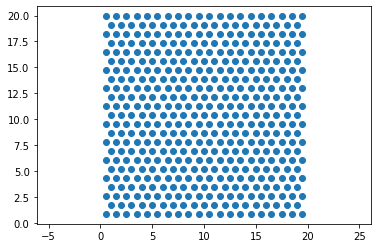

In [6]:
triangular_lattice = []
a=1
limit = 20
for i in range(-30,30):
    for j in range(-30,30):
        triangular_lattice.append([a*i + a/2*j  , a*np.sqrt(3)/2*j])
triangular_lattice = np.array(triangular_lattice)
triangular_lattice = triangular_lattice[triangular_lattice[:,0]<limit]
triangular_lattice = triangular_lattice[triangular_lattice[:,0]>0]
triangular_lattice = triangular_lattice[triangular_lattice[:,1]<limit]
triangular_lattice = triangular_lattice[triangular_lattice[:,1]>0]
plt.scatter(triangular_lattice[:,0],triangular_lattice[:,1])
plt.axis('equal')

In [7]:
np.sqrt(40000 / len(position_list[0]) *2/np.sqrt(3))

4.505821462111698

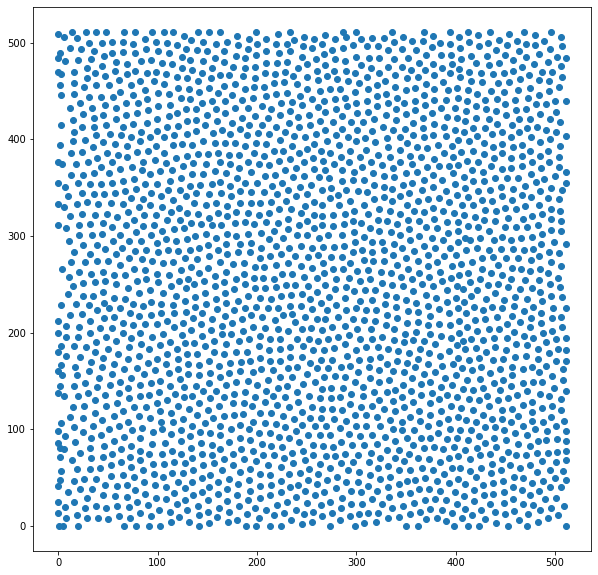

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(position_list[0].iloc[:,0], position_list[0].iloc[:,1])
plt.show()

In [8]:
qxy @ xy

NameError: name 'qxy' is not defined

In [11]:
from matplotlib import ticker, cm
def plot_structure_factor(molecule_positions, lim):
    positions = molecule_positions
    x = positions[0]
    y = positions[1]
    xy = np.append(x[:,np.newaxis], y[:,np.newaxis], axis=1).T
    qx = np.linspace(-lim, lim, 80)
    qy = np.linspace(-lim, lim, 80)
    qxx, qyy = np.meshgrid(qx, qy)
    qx = qxx.flatten()
    qy = qyy.flatten()
    qxy = np.append(qx[:,np.newaxis], qy[:,np.newaxis], axis=1)
    mags = np.abs(np.sum(np.exp(-1j * qxy @ xy), axis=1))
    mags = mags.reshape(qxx.shape)
    fig, ax = plt.subplots()
    cs = plt.imshow(mags)
    #cs = plt.contourf(qxx, qyy, mags, locator=ticker.LogLocator())
    ax.set_aspect('equal')
    plt.colorbar(cs)
    plt.clim(0,0.01)
    return 123
    #plt.show()

In [12]:
delta_r=[]
for i in range(len(positions)):
    for j in range(len(positions)):
        delta_x = positions[i,0] - positions[j,0]
        delta_y = positions[i,1] - positions[j,1]
        delta_r.append([delta_x, delta_y])
delta_r=np.array(delta_r)

NameError: name 'positions' is not defined

In [13]:
np.pi/np.shape(frames)[1]

0.006135923151542565

<Figure size 720x720 with 0 Axes>

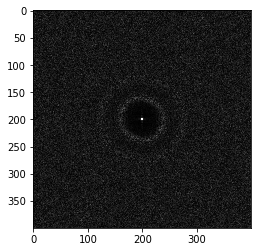

In [37]:
plt.figure(figsize=(10,10))
positions = position_list[0]
#positions = triangular_lattice
lim = np.pi#4*np.pi/np.sqrt(3)
x = positions[0]
y = positions[1]
xy = np.append(x[:,np.newaxis], y[:,np.newaxis], axis=1).T
qx = np.linspace(-lim, lim, 400)
qy = np.linspace(-lim, lim, 400)
qxx, qyy = np.meshgrid(qx, qy)
qx = qxx.flatten()
qy = qyy.flatten()
qxy = np.append(qx[:,np.newaxis], qy[:,np.newaxis], axis=1)
mags = np.abs(np.sum(np.exp(-1j * np.dot(qxy,xy)), axis=1))
mags = mags.reshape(qxx.shape)
fig, ax = plt.subplots()
plt.imshow(mags)
#plt.axhline(y=50, color='r', linestyle='-')
#cs = plt.contourf(qxx, qyy, mags, locator=ticker.LogLocator())
#ax.set_aspect('equal')
#plt.colorbar(cs)
#plt.clim(0,0.01)

In [101]:
frames.meters_per_pixel

3.906248046875e-10

In [102]:
from matplotlib.patches import Circle

In [122]:
1/4.2302

0.23639544229587253

In [ ]:
4.2302    8.0715   11.9128   15.7541

In [45]:
np.max(mags)

457.5699065716696

In [46]:
np.min(mags)

0.11467732132905066

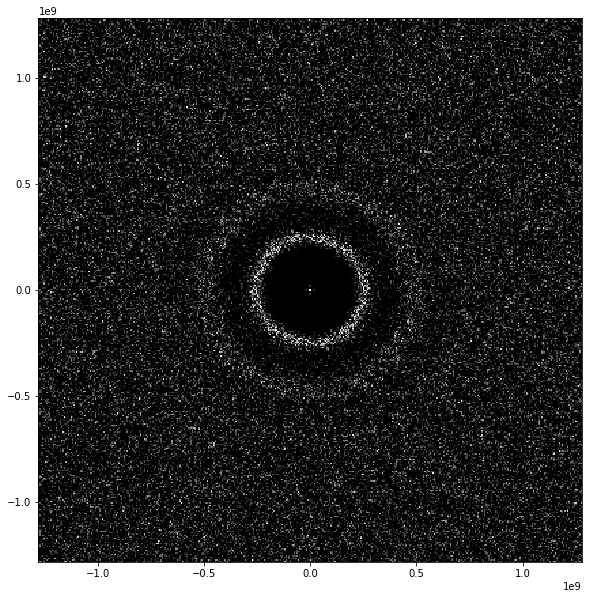

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(mags,vmax=np.max(mags)*0.3,vmin=np.min(mags)*400, extent = np.array([-lim,lim,-lim,lim])/frames.meters_per_pixel/2/np.pi)
#circ = Circle((0,0),1/4.2302*1e9, linestyle='--', facecolor='none', edgecolor = 'r', linewidth = 2)
#circ2 = Circle((0,0),1/(4.2302/2)*1e9, linestyle='--', facecolor='none', edgecolor = 'r', linewidth = 2)
#ax.add_patch(circ)
#ax.add_patch(circ2)

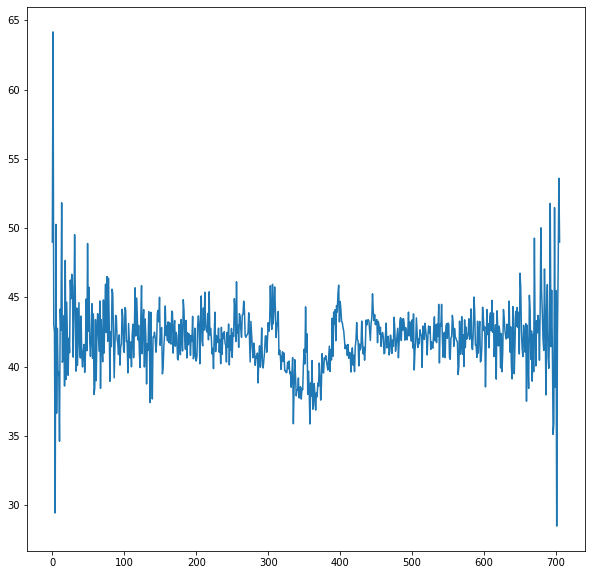

In [51]:
profile = radial_profile(mags,[0,0])
plt.plot(np.arange(len(profile)), profile)

In [49]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

0
123
0 failed


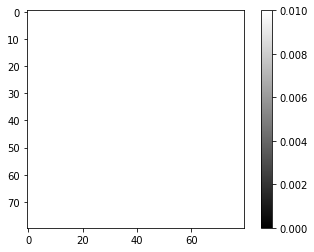

In [22]:
for i, molecule_position in enumerate(position_list):
    #try:
        print(i)
        mags = plot_structure_factor(molecule_position, np.pi)
        print(mags)
    #except:
        print("{} failed".format(i))

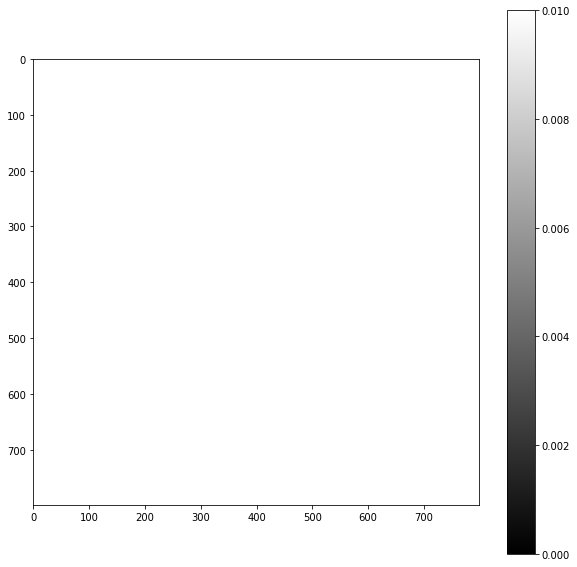

In [43]:
mags = plot_structure_factor(molecule_position, np.pi)

In [ ]:
lattice = pd.DataFrame(lattice)

In [ ]:
import seaborn as sns
sns.scatterplot(x=0, y=1, data=lattice, s=5)

In [ ]:
lattice = []
atom_a = np.array([0, 0])
atom_b = np.array([1/np.sqrt(3), 0])
a1 = np.array([np.sqrt(3)/2, 1/2])
a2 = np.array([np.sqrt(3)/2, -1/2])
for i in range(20):
    for j in range(20):
        cell_origin = i * a1 + j * a2
        lattice.append(cell_origin + atom_a)
        lattice.append(cell_origin + atom_b)
lattice = np.array(lattice)

In [ ]:
plot_structure_factor(lattice, np.pi)